<a href="https://colab.research.google.com/github/seunghwan1228/Time-Series-Example/blob/master/TimeSeries_Integrated_Ensemble_checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv

--2019-11-13 03:58:36--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2010492 (1.9M) [text/plain]
Saving to: ‘pollution.csv’

pollution.csv       100%[===================>]   1.92M  --.-KB/s    in 0.09s   

2019-11-13 03:58:37 (21.9 MB/s) - ‘pollution.csv’ saved [2010492/2010492]



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models, layers
from keras.preprocessing import sequence
from keras.preprocessing.sequence import TimeseriesGenerator

import os
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [0]:
df = pd.read_csv('/content/pollution.csv')

In [5]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [0]:
df['year'] = df['year'].astype('str')
df['month'] = df['month'].astype('str')
df['day'] = df['day'].astype('str')
df['hour'] = df['hour'].astype('str')

In [0]:
df['data_concat'] = df['year'] + '-' + df['month'] + '-' + df['day'] + ' ' + df['hour'] + ':00:00'

In [49]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,data_concat
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,NaN,2010-1-1 0:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,NaN,2010-1-1 1:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,NaN,2010-1-1 2:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,NaN,2010-1-1 3:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,NaN,2010-1-1 4:00:00


In [0]:
df['date_concat'] = pd.to_datetime(df['data_concat'])

In [51]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,data_concat,date_concat
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,NaN,2010-1-1 0:00:00,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,NaN,2010-1-1 1:00:00,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,NaN,2010-1-1 2:00:00,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,NaN,2010-1-1 3:00:00,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,NaN,2010-1-1 4:00:00,2010-01-01 04:00:00


In [0]:
drop_lists = ['year', 'month', 'day', 'hour', 'data_concat']

for i in drop_lists:
  df.drop(f'{i}', axis=1, inplace=True)

In [55]:
df.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date_concat
0,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 10 columns):
No             43824 non-null int64
pm2.5          41757 non-null float64
DEWP           43824 non-null int64
TEMP           43824 non-null float64
PRES           43824 non-null float64
cbwd           43824 non-null object
Iws            43824 non-null float64
Is             43824 non-null int64
Ir             43824 non-null int64
date_concat    43824 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 3.3+ MB


In [0]:
df.drop('No', axis=1, inplace=True)

In [58]:
df.set_index('date_concat', drop=True, inplace=True)

df.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date_concat,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


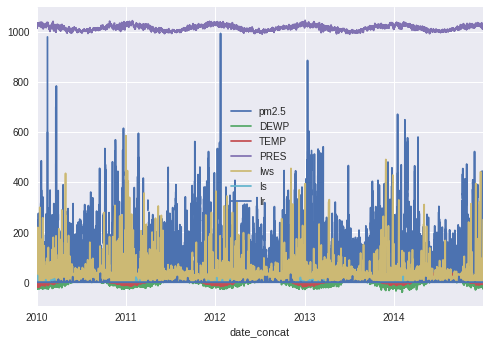

In [74]:
df.plot()

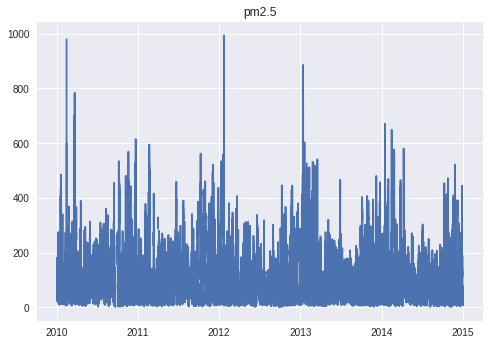

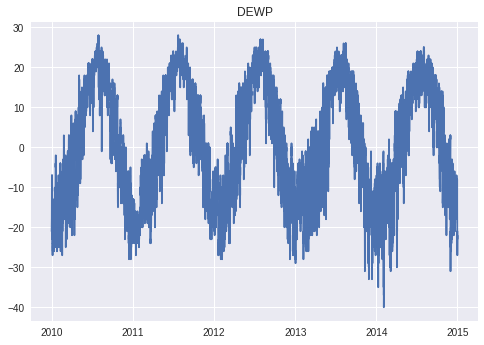

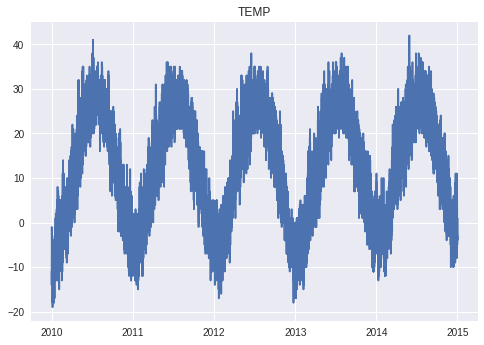

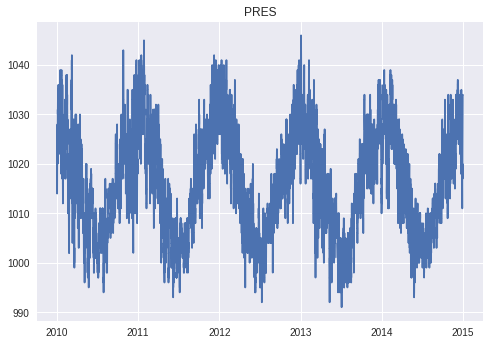

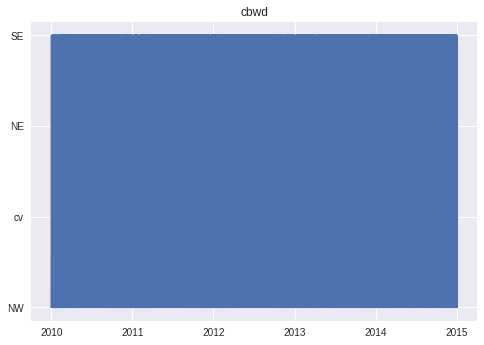

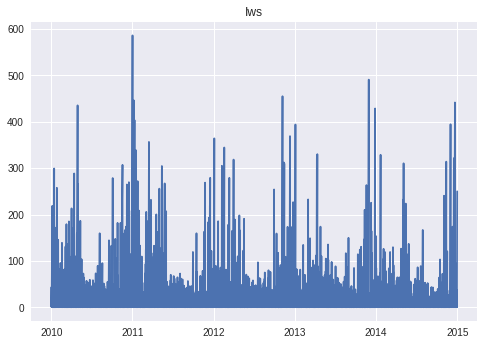

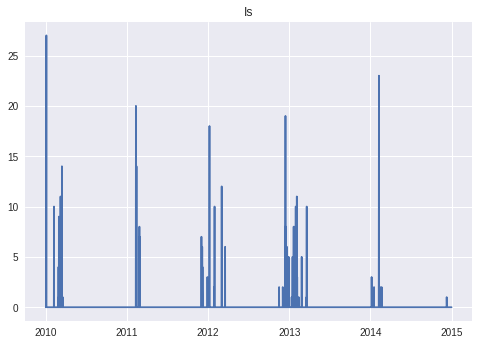

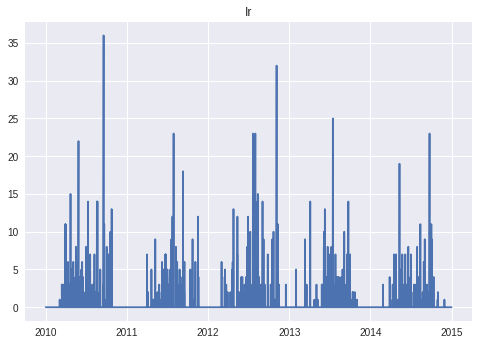

In [75]:
for i in df.columns:
  plt.figure()
  plt.title(i)
  plt.plot(df[i])

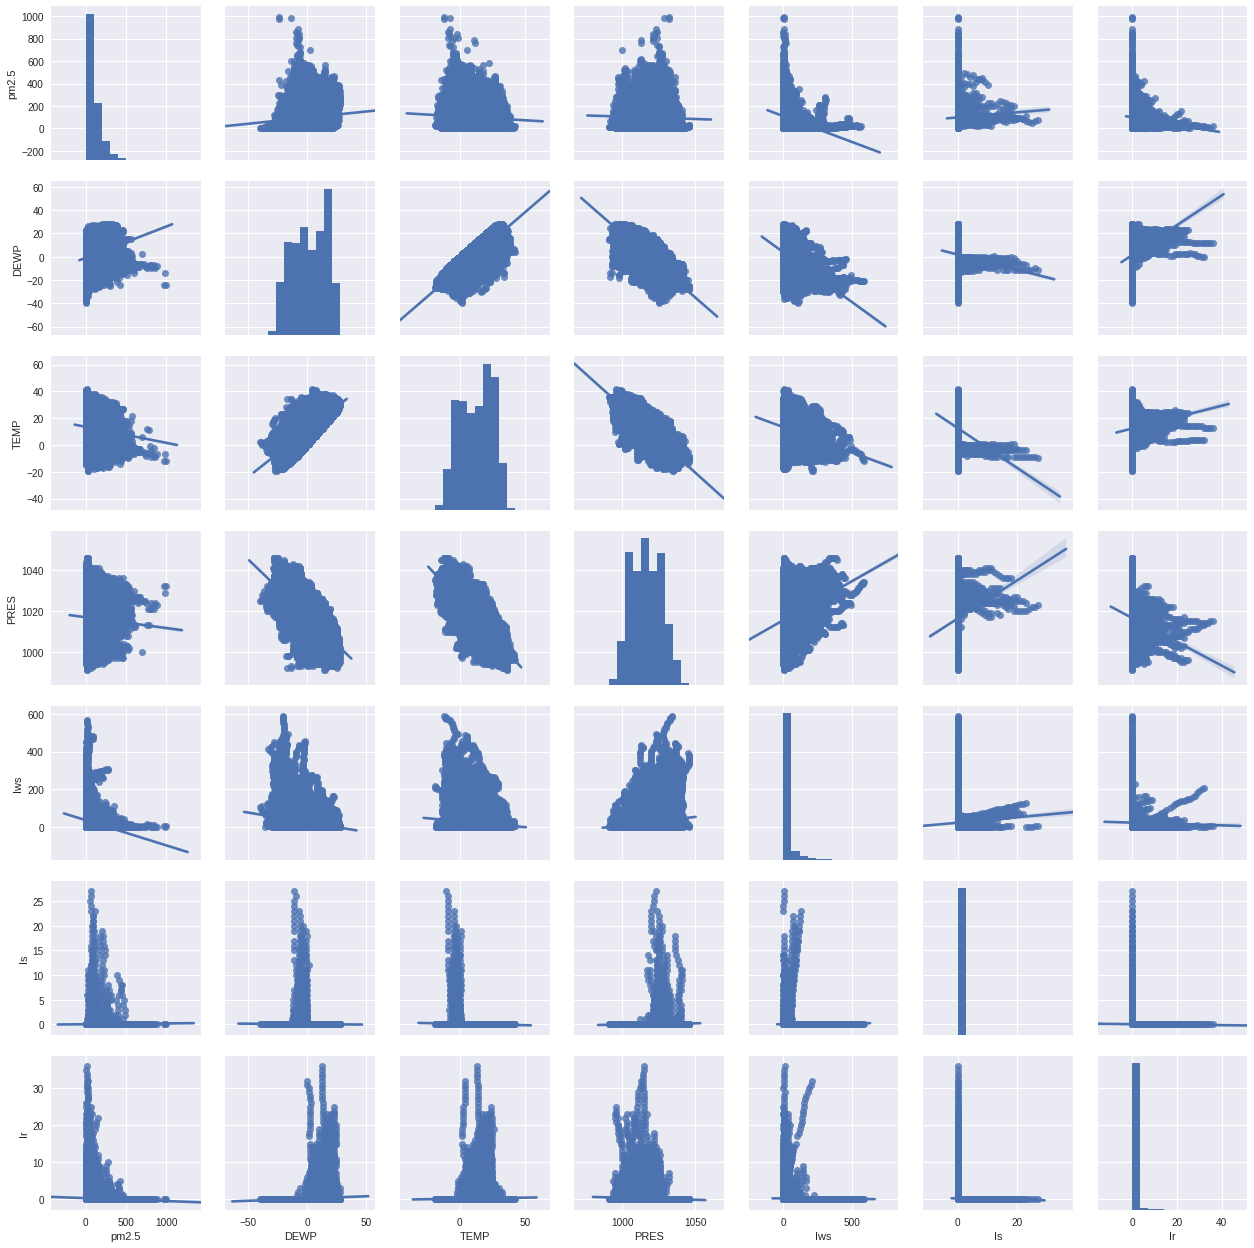

In [77]:
sns.pairplot(df, kind='reg')

In [60]:
df.describe()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


# For Checking Time Sereis Generator, slice small part from data

In [0]:
gen_test_data = df.iloc[:10, 2]

In [0]:
gen_test_data = gen_test_data.values

In [64]:
gen_test_data

array([-11., -12., -11., -14., -12., -10.,  -9.,  -9.,  -9.,  -8.])

In [87]:
gen = TimeseriesGenerator(gen_test_data, gen_test_data, length=1, batch_size=1)

# array([-11., -12., -11., -14., -12., -10.,  -9.,  -9.,  -9.,  -8.])
for i in gen:
  print('x data')
  print(i[0])
  print('\n')
  print('y_data')
  print(i[1])
  print('\n')
  print('------------')

x data
[[-11.]]


y_data
[-12.]


------------
x data
[[-12.]]


y_data
[-11.]


------------
x data
[[-11.]]


y_data
[-14.]


------------
x data
[[-14.]]


y_data
[-12.]


------------
x data
[[-12.]]


y_data
[-10.]


------------
x data
[[-10.]]


y_data
[-9.]


------------
x data
[[-9.]]


y_data
[-9.]


------------
x data
[[-9.]]


y_data
[-9.]


------------
x data
[[-9.]]


y_data
[-8.]


------------


In [88]:
gen = TimeseriesGenerator(gen_test_data, gen_test_data, length=1, batch_size=2)

# array([-11., -12., -11., -14., -12., -10.,  -9.,  -9.,  -9.,  -8.])
for i in gen:
  print('x data')
  print(i[0])
  print('\n')
  print('y_data')
  print(i[1])
  print('\n')
  print('------------')

x data
[[-11.]
 [-12.]]


y_data
[-12. -11.]


------------
x data
[[-11.]
 [-14.]]


y_data
[-14. -12.]


------------
x data
[[-12.]
 [-10.]]


y_data
[-10.  -9.]


------------
x data
[[-9.]
 [-9.]]


y_data
[-9. -9.]


------------
x data
[[-9.]]


y_data
[-8.]


------------


In [89]:
gen = TimeseriesGenerator(gen_test_data, gen_test_data, length=2, batch_size=1)

# array([-11., -12., -11., -14., -12., -10.,  -9.,  -9.,  -9.,  -8.])
for i in gen:
  print('x data')
  print(i[0])
  print('\n')
  print('y_data')
  print(i[1])
  print('\n')
  print('------------')

x data
[[-11. -12.]]


y_data
[-11.]


------------
x data
[[-12. -11.]]


y_data
[-14.]


------------
x data
[[-11. -14.]]


y_data
[-12.]


------------
x data
[[-14. -12.]]


y_data
[-10.]


------------
x data
[[-12. -10.]]


y_data
[-9.]


------------
x data
[[-10.  -9.]]


y_data
[-9.]


------------
x data
[[-9. -9.]]


y_data
[-9.]


------------
x data
[[-9. -9.]]


y_data
[-8.]


------------


In [90]:
gen = TimeseriesGenerator(gen_test_data, gen_test_data, length=2, batch_size=2)

# array([-11., -12., -11., -14., -12., -10.,  -9.,  -9.,  -9.,  -8.])
for i in gen:
  print('x data')
  print(i[0])
  print('\n')
  print('y_data')
  print(i[1])
  print('\n')
  print('------------')

x data
[[-11. -12.]
 [-12. -11.]]


y_data
[-11. -14.]


------------
x data
[[-11. -14.]
 [-14. -12.]]


y_data
[-12. -10.]


------------
x data
[[-12. -10.]
 [-10.  -9.]]


y_data
[-9. -9.]


------------
x data
[[-9. -9.]
 [-9. -9.]]


y_data
[-9. -8.]


------------


In [83]:
gen = TimeseriesGenerator(gen_test_data, gen_test_data, length=3, batch_size=1)

# array([-11., -12., -11., -14., -12., -10.,  -9.,  -9.,  -9.,  -8.])
for i in gen:
  print('x data')
  print(i[0])
  print('\n')
  print('y_data')
  print(i[1])
  print('\n')
  print('------------')

x data
[[-11. -12. -11.]]


y_data
[-14.]


x data
[[-12. -11. -14.]]


y_data
[-12.]


x data
[[-11. -14. -12.]]


y_data
[-10.]


x data
[[-14. -12. -10.]]


y_data
[-9.]


x data
[[-12. -10.  -9.]]


y_data
[-9.]


x data
[[-10.  -9.  -9.]]


y_data
[-9.]


x data
[[-9. -9. -9.]]


y_data
[-8.]




In [91]:
gen = TimeseriesGenerator(gen_test_data, gen_test_data, length=3, batch_size=2)

# array([-11., -12., -11., -14., -12., -10.,  -9.,  -9.,  -9.,  -8.])
for i in gen:
  print('x data')
  print(i[0])
  print('\n')
  print('y_data')
  print(i[1])
  print('\n')
  print('------------')

x data
[[-11. -12. -11.]
 [-12. -11. -14.]]


y_data
[-14. -12.]


------------
x data
[[-11. -14. -12.]
 [-14. -12. -10.]]


y_data
[-10.  -9.]


------------
x data
[[-12. -10.  -9.]
 [-10.  -9.  -9.]]


y_data
[-9. -9.]


------------
x data
[[-9. -9. -9.]]


y_data
[-8.]


------------


In [92]:
gen = TimeseriesGenerator(gen_test_data, gen_test_data, length=3, batch_size=3)

# array([-11., -12., -11., -14., -12., -10.,  -9.,  -9.,  -9.,  -8.])
for i in gen:
  print('x data')
  print(i[0])
  print('\n')
  print('y_data')
  print(i[1])
  print('\n')
  print('------------')

x data
[[-11. -12. -11.]
 [-12. -11. -14.]
 [-11. -14. -12.]]


y_data
[-14. -12. -10.]


------------
x data
[[-14. -12. -10.]
 [-12. -10.  -9.]
 [-10.  -9.  -9.]]


y_data
[-9. -9. -9.]


------------
x data
[[-9. -9. -9.]]


y_data
[-8.]


------------
